# I2Thor


## Setup

In [3]:
# Matt
import sys
import os
sys.path.append(os.path.abspath('../combots_venv/lib/python3.12/site-packages'))
%pip install cltl.combot --break-system-packages

from dotenv import load_dotenv
# Get the current working directory
current_dir = os.getcwd()
# Construct the relative path to the .env file
env_path = os.path.join(current_dir, '../.env')
# Load the .env file
load_dotenv(env_path)


# OpenAI API Key
api_key = os.getenv("OPENAI_API_KEY")

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
# Collab
!pip install --upgrade ai2thor --quiet
!pip install ai2thor-colab prior --upgrade &> /dev/null
!pip install python-dotenv
%pip install cltl.combot --break-system-packages
import os
os.system('apt-get install xvfb')
import ai2thor_colab
ai2thor_colab.start_xserver()

from dotenv import load_dotenv

# Load the .env file
load_dotenv()

# OpenAI API Key
api_key = os.getenv("OPENAI_API_KEY")

In [4]:
import prior

dataset = prior.load_dataset("procthor-10k")
dataset

[AI2-THOR WARNING] There has been an update to ProcTHOR-10K that must be used with AI2-THOR version 5.0+. To use the new version of ProcTHOR-10K, please update AI2-THOR to version 5.0+ by running:
    pip install --upgrade ai2thor
Alternatively, to downgrade to the old version of ProcTHOR-10K, run:
   prior.load_dataset("procthor-10k", revision="ab3cacd0fc17754d4c080a3fd50b18395fae8647")


Loading test: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 5631.96it/s]


DatasetDict(
    train=Dataset(
    dataset=procthor-dataset,
    size=10000,
    split=train
),
    val=Dataset(
    dataset=procthor-dataset,
    size=1000,
    split=val
),
    test=Dataset(
    dataset=procthor-dataset,
    size=1000,
    split=test
)
)

In [5]:
house = dataset["train"][11]

In [6]:
from ai2thor.controller import Controller

In [7]:

controller = Controller(scene=house, visibilityDistance=10, width=750, height=750)

## Moving around

In [8]:
from PIL import Image
#Image.fromarray(controller.last_event.frame)

In [9]:
#controller.step("RotateRight") # or "RotateLeft"

In [10]:
#controller.step("MoveAhead") # or "MoveBack", "MoveLeft", "MoveRight"

In [11]:
event = controller.step(action="GetReachablePositions")
reachable_positions = event.metadata["actionReturn"]
#event.metadata["actionReturn"]

In [12]:
unique_object_list = [
"AlarmClock",
"AluminumFoil",
"Apple",
"ArmChair",
"BaseballBat",
"BasketBall",
"Bathtub",
"BathtubBasin",
"Bed",
"Blinds",
"Book",
"Boots",
"Bottle",
"Bowl",
"Box",
"Bread",
"ButterKnife",
"Cabinet",
"Candle",
"CD",
"CellPhone",
"Chair",
"Cloth",
"CoffeeMachine",
"CoffeeTable",
"CounterTop",
"CreditCard",
"Cup",
"Curtains",
"Desk",
"DeskLamp",
"Desktop",
"DiningTable",
"DishSponge",
"DogBed",
"Drawer",
"Dresser",
"Dumbbell",
"Egg",
"Faucet",
"Floor",
"FloorLamp",
"Footstool",
"Fork",
"Fridge",
"GarbageBag",
"GarbageCan",
"HandTowel",
"HandTowelHolder",
"HousePlant",
"Kettle",
"KeyChain",
"Knife",
"Ladle",
"Laptop",
"LaundryHamper",
"Lettuce",
"LightSwitch",
"Microwave",
"Mirror",
"Mug",
"Newspaper",
"Ottoman",
"Painting",
"Pan",
"PaperTowelRoll",
"Pen",
"Pencil",
"PepperShaker",
"Pillow",
"Plate",
"Plunger",
"Poster",
"Pot",
"Potato",
"RemoteControl",
"RoomDecor",
"Safe",
"SaltShaker",
"ScrubBrush",
"Shelf",
"ShelvingUnit",
"ShowerCurtain",
"ShowerDoor",
"ShowerGlass",
"ShowerHead",
"SideTable",
"Sink",
"SinkBasin",
"SoapBar",
"SoapBottle",
"Sofa",
"Spatula",
"Spoon",
"SprayBottle",
"Statue",
"Stool",
"StoveBurner",
"StoveKnob",
"TableTopDecor",
"TargetCircle",
"TeddyBear",
"Television",
"TennisRacket",
"TissueBox",
"Toaster",
"Toilet",
"ToiletPaper",
"ToiletPaperHanger",
"Tomato",
"Towel",
"TowelHolder",
"TVStand",
"VacuumCleaner",
"Vase",
"Watch",
"WateringCan",
"Window",
"WineBottle"
]

# MY STUFF

TELEPORT SOMEWHERE RANDOM

Teleporting the agent to {'x': 0.5, 'y': 0.9009997844696045, 'z': 6.5}  with rotation 99


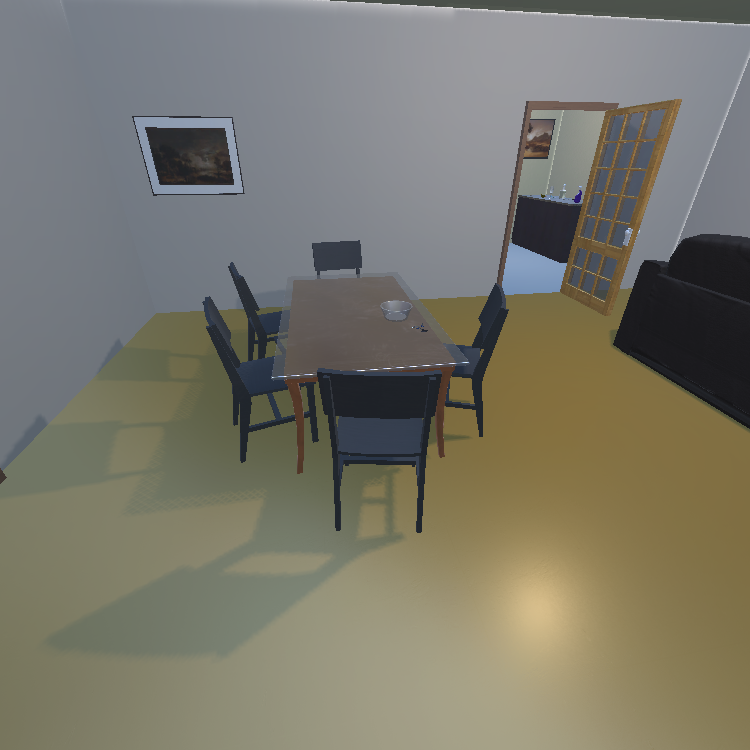

In [13]:
import random

position = random.choice(reachable_positions)
rotation = random.choice(range(360))
print("Teleporting the agent to", position, " with rotation", rotation)

event = controller.step(action="Teleport", position=position, rotation=rotation)

Image.fromarray(event.frame)

IMAGE WITH 2 PAINTING

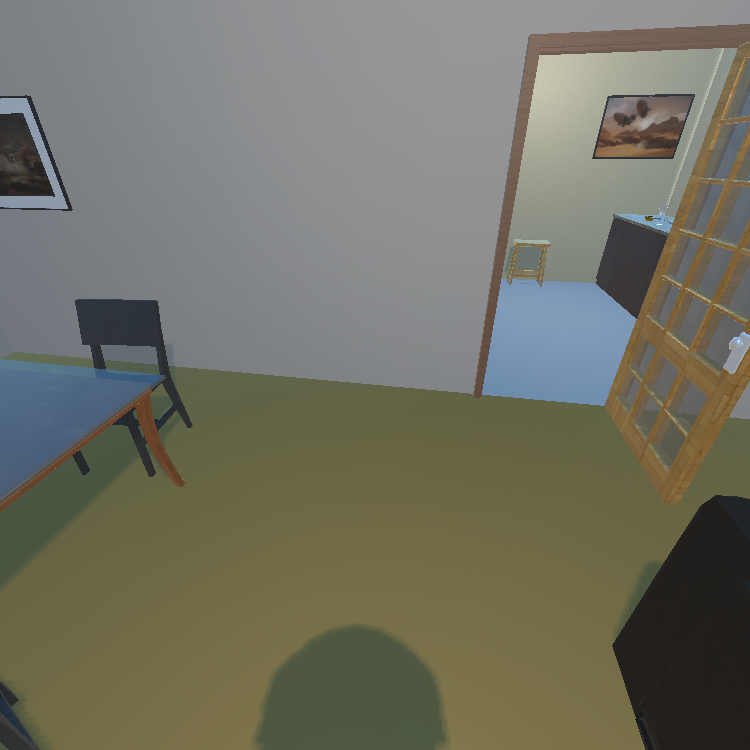

In [14]:
event = controller.step(action="Teleport", position={'x': 2.5, 'y': 0.9009997844696045, 'z': 4.5}, rotation=80)

Image.fromarray(event.frame)

In [16]:
from openaiapi import analyze_prompt, analyze_image
from utils import numpy_to_base64

frame = controller.last_event.frame
base64_string = numpy_to_base64(frame)

In [17]:
frame = controller.last_event.frame
base64_string = numpy_to_base64(frame)
#analyze_image(base64_string, api_key=api_key)
#analyze_prompt(api_key=api_key, prompt = "your momma", model="gpt-4o-mini")

In [18]:
import math

def teleport_in_front_of_object(controller, object_position, reachable_positions, distance=1.0):
  """Teleports the agent to the closest reachable position in front of an object.

  Args:
    controller: The AI2Thor controller.
    object_position: The position of the target object.
    reachable_positions: A list of reachable positions in the scene.
    distance: The desired distance in front of the object.

  Returns:
    The event after teleporting.
  """

  # Calculate the target position in front of the object
  target_position = {
      "x": object_position["x"] - distance,
      "y": object_position["y"],
      "z": object_position["z"]
  }

  # Find the closest reachable position
  closest_position = None
  min_distance = float('inf')

  for position in reachable_positions:
    dist = math.sqrt((position["x"] - target_position["x"])**2 +
                     (position["z"] - target_position["z"])**2)
    if dist < min_distance:
      min_distance = dist
      closest_position = position

# Calculate rotation towards the object
  dx = object_position["x"] - closest_position["x"]
  dz = object_position["z"] - closest_position["z"]
  rotation = math.degrees(math.atan2(dx, dz))

  # Teleport and rotate
  event = controller.step(action="Teleport", position=closest_position, rotation=rotation)

  return event  # Return the event after adjusting view angle

In [19]:
def get_object_positions(controller, matched_object):
  """
  Finds the positions of all visible objects of a specific type.

  Args:
    controller: The AI2Thor controller.
    matched_object: The type of object to find (e.g., "Painting", "Chair", "Table").

  Returns:
    A list of positions for the specified object type.
  """
  visible_objects = [obj for obj in controller.last_event.metadata["objects"] if obj["visible"]]
  objects_of_interest = [obj for obj in visible_objects if obj["objectType"] == matched_object]
  object_positions = []
  for obj in objects_of_interest:
      #print(obj["name"], obj["position"])
      object_positions.append(obj["position"])
  return object_positions

In [20]:
visible_objects = [obj for obj in controller.last_event.metadata["objects"] if obj["visible"]]
paintings = [obj for obj in visible_objects if obj["objectType"] == "Painting"]
painting_positions = []
for painting in paintings:
    print(painting["name"], painting["position"])
    painting_positions.append(painting["position"])


Painting|2|6 {'x': 8.383004188537598, 'y': 1.8958626985549927, 'z': 2.2807140350341797}
Painting|3|6 {'x': 5.0281662940979, 'y': 1.585843563079834, 'z': 7.616852760314941}


In [21]:
visible_objects = [obj for obj in controller.last_event.metadata["objects"] if obj["visible"]]
paintings = [obj for obj in visible_objects if obj["objectType"] == "Painting"]
all_painting_positions = []  # To store all painting positions

for _ in range(3):  # Rotate three times
    # Get visible paintings and their positions
    current_painting_positions = []
    for painting in paintings:
        print(painting["name"], painting["position"])
        current_painting_positions.append(painting["position"])

    # Add current painting positions to the overall list
    all_painting_positions.extend(current_painting_positions)

    # Rotate the agent
    controller.step("RotateRight")

    # Update visible objects and paintings for the next iteration
    visible_objects = [obj for obj in controller.last_event.metadata["objects"] if obj["visible"]]
    paintings = [obj for obj in visible_objects if obj["objectType"] == "Painting"]

print("All painting positions in the room:", all_painting_positions)

Painting|2|6 {'x': 8.383004188537598, 'y': 1.8958626985549927, 'z': 2.2807140350341797}
Painting|3|6 {'x': 5.0281662940979, 'y': 1.585843563079834, 'z': 7.616852760314941}
Painting|3|5 {'x': 0.004995774477720261, 'y': 1.3465479612350464, 'z': 4.775585651397705}
All painting positions in the room: [{'x': 8.383004188537598, 'y': 1.8958626985549927, 'z': 2.2807140350341797}, {'x': 5.0281662940979, 'y': 1.585843563079834, 'z': 7.616852760314941}, {'x': 0.004995774477720261, 'y': 1.3465479612350464, 'z': 4.775585651397705}]


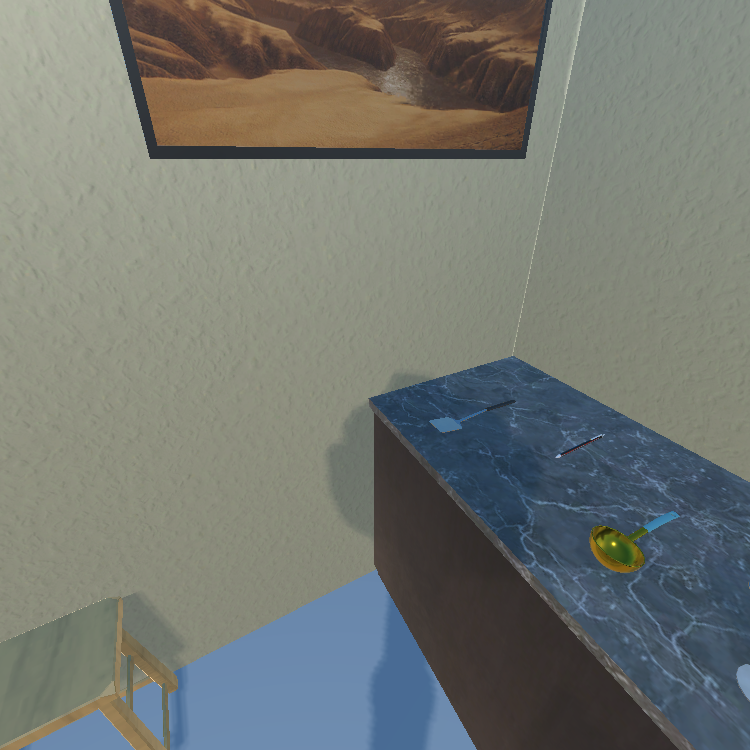

In [49]:
# Teleport to the first painting
event = controller.step(action="GetReachablePositions")
reachable_positions = event.metadata["actionReturn"]

#painting_position = painting_positions[0]
#painting_position = all_painting_positions[1]
painting_position = get_object_positions(controller, "Painting")[0]

event = teleport_in_front_of_object(controller, painting_position, reachable_positions)
Image.fromarray(event.frame)

In [50]:
#controller.step("LookDown")
#Image.fromarray(controller.last_event.frame)

# We could probably do this automatically, but we could also ask user to ask robot to look up or down

# But think about if this would even be necessary? its just for the gpt4o system to describe it a tiny bit better which may be redundant

# after we take look up or down we should return to the original state, THIS IS IMPORTANT OTHERWISE IT WILL MESS WITH TELEPORTING

## Events

After each action (eg. "MoveAhead", "RotateRight"...) an `Event` is returned. It contains a lot of information that could be useful for your project. The very first action after you've instantiated the controller is always "CreateHouse". You can access the `Event` data for this action as follows:

In [51]:
controller.last_event

<ai2thor.server.Event at 0x7a87c5e9f800
    .metadata["lastAction"] = Teleport
    .metadata["lastActionSuccess"] = True
    .metadata["errorMessage"] = "
    .metadata["actionReturn"] = None
>

We can also get an image of what the most recent scene looks like (i.e. what the robot can see). To do this, we need to use `.frame`. This gives us the RGB frame of the scene, in a numpy array:

In [52]:
controller.last_event.frame

array([[[180, 181, 165],
        [177, 180, 164],
        [177, 180, 164],
        ...,
        [134, 141, 132],
        [133, 142, 133],
        [132, 141, 132]],

       [[180, 180, 166],
        [178, 180, 165],
        [177, 180, 164],
        ...,
        [136, 143, 131],
        [135, 143, 135],
        [133, 142, 133]],

       [[180, 181, 166],
        [178, 181, 165],
        [176, 180, 162],
        ...,
        [135, 142, 133],
        [136, 143, 136],
        [134, 142, 134]],

       ...,

       [[145, 139, 113],
        [145, 139, 114],
        [146, 140, 114],
        ...,
        [ 78,  97, 118],
        [ 79, 100, 122],
        [ 81, 103, 124]],

       [[145, 139, 114],
        [145, 121,  83],
        [145, 122,  84],
        ...,
        [ 77,  97, 117],
        [ 78,  97, 118],
        [ 79, 100, 121]],

       [[145, 122,  84],
        [145, 121,  84],
        [145, 121,  83],
        ...,
        [ 77,  97, 117],
        [ 77,  97, 117],
        [ 78,  97, 118]]

We can also easily turn this numpy array into an image:

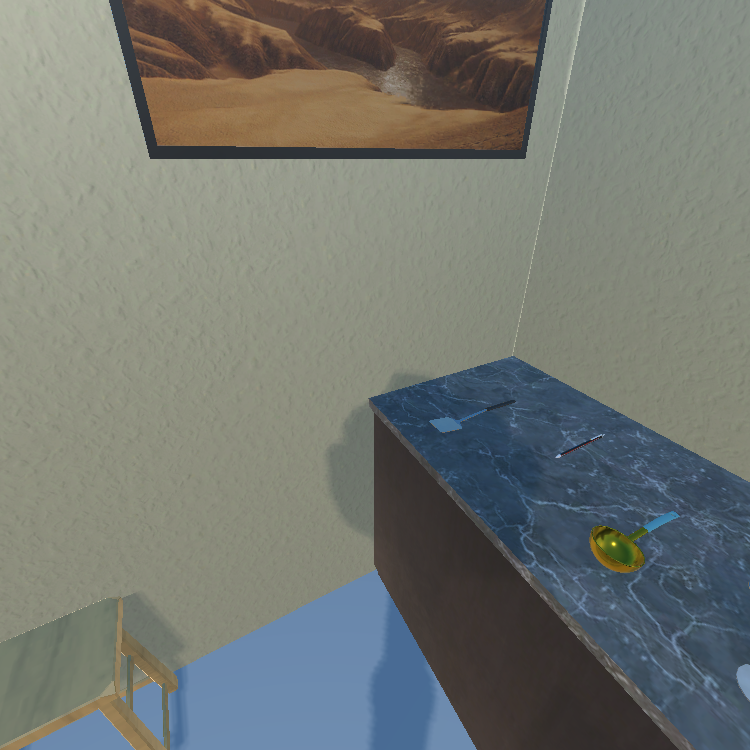

In [53]:
Image.fromarray(controller.last_event.frame)

One very important type of data you can get from this is the `.metadata`. It contains information on for example the agent's current position and rotation, as well as all objects in the current view, including a lot of object properties. Let's first look at the information about the agent:

In [54]:
controller.last_event.metadata["agent"]

{'name': 'agent',
 'position': {'x': 7.5, 'y': 0.9009993672370911, 'z': 2.75},
 'rotation': {'x': -0.0, 'y': 117.98908996582031, 'z': 0.0},
 'cameraHorizon': 30.000003814697266,
 'isStanding': True,
 'inHighFrictionArea': False}

Now let's look at the objects in the metadata:

In [55]:
for object in controller.last_event.metadata["objects"]:
  print(object["name"])

Book|surface|3|14
Bowl|surface|3|10
Candle|surface|3|9
Chair|3|1|5
Chair|3|1|4
Chair|3|1|3
Chair|3|1|2
Chair|3|1|1
CounterTop|2|0
Cup|surface|2|8
DeskLamp|surface|3|12
DiningTable|3|1|0
door|2|3
door|1|3
room|3
Floor
room|2
Fridge|2|1
HousePlant|2|3|0
KeyChain|surface|3|11
Ladle|surface|2|3
Painting|2|6
Painting|3|6
Painting|3|5
Pen|surface|2|0
Pillow|surface|3|13
Shelf (3)
Shelf (1)
Shelf (2)
Shelf (3)
Shelf (4)
Shelf (6)
Shelf (5)
Shelf (1)
Shelf (5)
Shelf (4)
Shelf (2)
Shelf (5)
Shelf
Shelf (1)
Shelf (6)
Shelf (3)
Shelf (5)
Shelf (2)
Shelf (4)
Shelf (4)
Shelf (2)
Shelf
Shelf (6)
Shelf (1)
Shelf (3)
ShelvingUnit|3|3
ShelvingUnit|2|2
ShelvingUnit|3|4
SideTable|3|2
SoapBottle|surface|2|2
Sofa|3|0|1
Spatula|surface|2|6
Spatula|surface|2|5
Spoon|surface|2|4
SprayBottle|surface|2|1
Stool|2|4
Television|2|5
Television|3|0|2
TVStand|3|0|0
Vase|surface|3|15
Vase|surface|2|7
wall|3|5.03|1.68|5.03|5.03
wall|2|5.03|1.68|5.03|5.03
wall|2|5.03|5.03|8.39|5.03
wall|2|8.39|1.68|8.39|5.03
wall|2|5.03

You probably noticed that there are quite a few objects that you cannot actually see if you look at the visualization of the current frame. This is because all objects that are visible (i.e. not hidden behind something) and within the `visibilityDistance` (specified when we initialized the controller) are shown. If you only want the objects that the robot can actually see, you need to only pick objects with `visible=True` (visible being one of the object attributes).

In [56]:
for object in controller.last_event.metadata["objects"]:
  if object["visible"]:
    print(object["name"])

CounterTop|2|0
Ladle|surface|2|3
Painting|2|6
Pen|surface|2|0
Spatula|surface|2|5
Spoon|surface|2|4
Stool|2|4
wall|2|8.39|1.68|8.39|5.03
wall|2|5.03|1.68|8.39|1.68
wall|exterior|8.39|1.68|8.39|5.03


Finally, let's look at what other properties the currently visible objects have:

In [57]:
for object in controller.last_event.metadata["objects"]:
  if object["visible"]:
    print(object)

{'name': 'CounterTop|2|0', 'position': {'x': 8.361964225769043, 'y': 2.9802322387695312e-08, 'z': 1.7049989700317383}, 'rotation': {'x': -0.0, 'y': 0.0, 'z': 0.0}, 'visible': True, 'isInteractable': True, 'receptacle': True, 'toggleable': False, 'isToggled': False, 'breakable': False, 'isBroken': False, 'canFillWithLiquid': False, 'isFilledWithLiquid': False, 'fillLiquid': None, 'dirtyable': False, 'isDirty': False, 'canBeUsedUp': False, 'isUsedUp': False, 'cookable': False, 'isCooked': False, 'temperature': 'RoomTemp', 'isHeatSource': False, 'isColdSource': False, 'sliceable': False, 'isSliced': False, 'openable': False, 'isOpen': False, 'openness': 0.0, 'pickupable': False, 'isPickedUp': False, 'moveable': False, 'mass': 0.0, 'salientMaterials': None, 'receptacleObjectIds': ['Spatula|surface|2|5', 'Ladle|surface|2|3', 'Pen|surface|2|0', 'Cup|surface|2|8', 'Spoon|surface|2|4', 'SoapBottle|surface|2|2', 'Spatula|surface|2|6', 'SprayBottle|surface|2|1'], 'distance': 1.6269017457962036, 

## Test Interaction

In [29]:
# adding to the system path
sys.path.insert(0, os.path.abspath('../emissor_chat'))


from leolani_client import LeolaniChatClient, Action
emissor_path = "./emissor"
AGENT="Ai2Thor"
HUMAN = "Human"
leolaniClient = LeolaniChatClient(emissor_path=emissor_path, agent=AGENT, human=HUMAN)

In [31]:
utterance = f"Hi {HUMAN}. What do you see in the room?"
print(AGENT+">"+utterance)
leolaniClient._add_utterance(AGENT, utterance) 

Ai2Thor>Hi Human. What do you see in the room?


In [ ]:
# grab img of an item to look for

In [32]:
human_room_description = "there is a table. 5 chairs. wthere is a window. its probably a living room."

In [33]:
print(HUMAN+">"+human_room_description)
leolaniClient._add_utterance(HUMAN, human_room_description)

Human>there is a table. 5 chairs. wthere is a window. its probably a living room.


In [37]:
# claryfying questions
claryfying_questions_response = analyze_prompt(api_key=api_key, model = "gpt-4o-mini", prompt=f"Imagine you are a robot who needs to be on a exact location as the point of view that the human has. After a while, the human can no longer see this image. The human will most likely describe a room from memory. The human will most likely describe a few objects and maybe some other attributes, like colours of objects. Your task is to ask claryfing questions about the room and objects so that you (the robot) has the highest chance of finding where the human was standing. Remember, ask the questions as if you were directly talking to the human. Try not to ask for too much details and dont ask for too much; remember, the human has to describe the image from memory, so only ask what you deem most important. \n Human description: {human_room_description}")
claryfying_questions_response

({'id': 'chatcmpl-AYB9UFxKOGS7ovk8pzdI5fywmWtN8',
  'object': 'chat.completion',
  'created': 1732709384,
  'model': 'gpt-4o-mini-2024-07-18',
  'choices': [{'index': 0,
    'message': {'role': 'assistant',
     'content': 'Thank you for the description! To help me find the exact location, could you tell me the color of the table and chairs? Also, which wall is the window on?',
     'refusal': None},
    'logprobs': None,
    'finish_reason': 'stop'}],
  'usage': {'prompt_tokens': 184,
   'completion_tokens': 35,
   'total_tokens': 219,
   'prompt_tokens_details': {'cached_tokens': 0, 'audio_tokens': 0},
   'completion_tokens_details': {'reasoning_tokens': 0,
    'audio_tokens': 0,
    'accepted_prediction_tokens': 0,
    'rejected_prediction_tokens': 0}},
  'system_fingerprint': 'fp_0705bf87c0'},
 3.433790683746338)

In [38]:
utterance = claryfying_questions_response[0]["choices"][0]["message"]["content"]
print(AGENT+">"+utterance)
leolaniClient._add_utterance(AGENT, utterance) 

Ai2Thor>Thank you for the description! To help me find the exact location, could you tell me the color of the table and chairs? Also, which wall is the window on?


In [40]:
human_room_description_clarified = "The table is blue, chairs are all black. The window is on the left wall in the same corner as th balcony doors."
print(HUMAN+">"+human_room_description_clarified)
leolaniClient._add_utterance(HUMAN, human_room_description)

Human>The table is blue, chairs are all black. The window is on the left wall in the same corner as th balcony doors.


In [41]:
utterance = "Describe the object I should look for."
print(AGENT+">"+utterance)
leolaniClient._add_utterance(AGENT, utterance)

Ai2Thor>Describe the object I should look for.


In [42]:
human_obj_description = "It's a dark painting with trees a moon. some clouds, a river."

In [43]:
print(HUMAN+">"+human_obj_description)
leolaniClient._add_utterance(HUMAN, human_room_description)

Human>It's a dark painting with trees a moon. some clouds, a river.


In [26]:
##### After completion, we save the scenario in the defined emissor folder.
leolaniClient._save_scenario() 

###Room description

### Object description

In [39]:
import re

def interactive_object_match(api_key: str, human_object_description: str, unique_object_list: list):
    """
    Interactively matches a human description of an object to one from a given list using an LLM.
    The function continues to refine guesses based on user confirmation or denial.

    Args:
        api_key (str): The API key for accessing the LLM.
        human_object_description (str): A description of the object to match.
        unique_object_list (list): The list of unique objects to match against.

    Returns:
        str: The confirmed object from the user.
        list: The matched object(s) from the list based on the LLM's response.
    """
    def ask_llm(description: str, objects: list) -> str:
        """Helper function to query the LLM for matching the description."""
        object_list_str = ", ".join(objects)
        prompt = (
            f"Imagine you are tasked with identifying an object from a given list based on its description. "
            f"The list of objects is: {object_list_str}. "
            f"Your task is to match the following description to one or more objects from the list: \n"
            f"'{description}'\n\n"
            "If you have a single best guess, respond with: 'To be sure, would you describe your object as {object}?'\n"
            "If you are unsure and need clarification between a few options, respond with: "
            "'To be sure, would you describe your object as {object1} or {object2}?'"
            "Only use objects from the list."
        )
        # Make sure the response is extracted correctly from the LLM
        llm_response = analyze_prompt(api_key=api_key, prompt=prompt)
        if isinstance(llm_response, dict) and "choices" in llm_response:
            return llm_response[0]["choices"][0]["message"]["content"]
        return llm_response  # Return raw response if format is unexpected

    current_description = human_object_description

    while True:
        # Query the LLM for a guess
        response = ask_llm(current_description, unique_object_list)
        print(response)

        # Extract the matched object(s) from the response
        matched_objects = re.findall(r"\b(" + "|".join(map(re.escape, unique_object_list)) + r")\b", response)

        if matched_objects:
            print(f"Matched object(s): {matched_objects}")
        else:
            print("No matched objects found in the response.")

        # Ask the user for confirmation or denial
        user_input = input("Is this correct? (yes/no): ").strip().lower()

        if user_input == "yes":
            print("Great! Object successfully matched.")
            return matched_objects[0] if len(matched_objects) == 1 else matched_objects
        elif user_input == "no":
            print("Let's refine the search.")
            # Ask for more details to refine the description
            clarifying_question = input("Can you provide more details or clarify the description?: ").strip()
            current_description += " " + clarifying_question
        else:
            print("Please respond with 'yes' or 'no'.")

# Example usage
human_object_description = "a leafy green item used for decoration or air purification"
unique_object_list = [
    "AlarmClock", "AluminumFoil", "Apple", "ArmChair", "BaseballBat", "BasketBall",
    "Bathtub", "BathtubBasin", "Bed", "Blinds", "Book", "Boots", "Bottle", "Bowl",
    "Box", "Bread", "ButterKnife", "Cabinet", "Candle", "CD", "CellPhone", "Chair",
    "Cloth", "CoffeeMachine", "CoffeeTable", "CounterTop", "CreditCard", "Cup",
    "Curtains", "Desk", "DeskLamp", "Desktop", "DiningTable", "DishSponge", "DogBed",
    "Drawer", "Dresser", "Dumbbell", "Egg", "Faucet", "Floor", "FloorLamp",
    "Footstool", "Fork", "Fridge", "GarbageBag", "GarbageCan", "HandTowel",
    "HandTowelHolder", "HousePlant", "Kettle", "KeyChain", "Knife", "Ladle", "Laptop",
    "LaundryHamper", "Lettuce", "LightSwitch", "Microwave", "Mirror", "Mug",
    "Newspaper", "Ottoman", "Painting", "Pan", "PaperTowelRoll", "Pen", "Pencil",
    "PepperShaker", "Pillow", "Plate", "Plunger", "Poster", "Pot", "Potato",
    "RemoteControl", "RoomDecor", "Safe", "SaltShaker", "ScrubBrush", "Shelf",
    "ShelvingUnit", "ShowerCurtain", "ShowerDoor", "ShowerGlass", "ShowerHead",
    "SideTable", "Sink", "SinkBasin", "SoapBar", "SoapBottle", "Sofa", "Spatula",
    "Spoon", "SprayBottle", "Statue", "Stool", "StoveBurner", "StoveKnob",
    "TableTopDecor", "TargetCircle", "TeddyBear", "Television", "TennisRacket",
    "TissueBox", "Toaster", "Toilet", "ToiletPaper", "ToiletPaperHanger", "Tomato",
    "Towel", "TowelHolder", "TVStand", "VacuumCleaner", "Vase", "Watch",
    "WateringCan", "Window", "WineBottle"
]

response = interactive_object_match(api_key=api_key, human_object_description=human_object_description, unique_object_list=unique_object_list)
print(f"Final matched object(s): {response}")


({'id': 'chatcmpl-AYBAXkcXg3vo2fWxArL1dMKy2ZV94', 'object': 'chat.completion', 'created': 1732709449, 'model': 'gpt-4o-2024-08-06', 'choices': [{'index': 0, 'message': {'role': 'assistant', 'content': 'To be sure, would you describe your object as HousePlant?', 'refusal': None}, 'logprobs': None, 'finish_reason': 'stop'}], 'usage': {'prompt_tokens': 460, 'completion_tokens': 13, 'total_tokens': 473, 'prompt_tokens_details': {'cached_tokens': 0, 'audio_tokens': 0}, 'completion_tokens_details': {'reasoning_tokens': 0, 'audio_tokens': 0, 'accepted_prediction_tokens': 0, 'rejected_prediction_tokens': 0}}, 'system_fingerprint': 'fp_7f6be3efb0'}, 0.6408576965332031)


TypeError: expected string or bytes-like object, got 'tuple'

### Location Classification

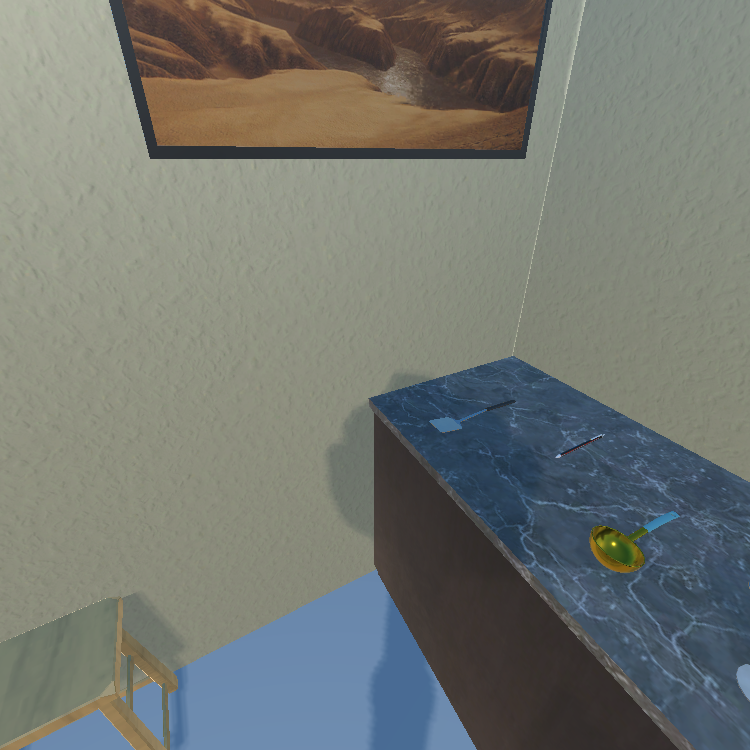

In [62]:
Image.fromarray(controller.last_event.frame)

In [63]:
frame = controller.last_event.frame
base64_string = numpy_to_base64(frame)
analyze_image(base64_string, api_key=api_key, prompt= "What's in this image? What kind of room are you in? Describe it as if you are in that room and you can directly see it.")



({'id': 'chatcmpl-AY9xvJOETNr27BSEvgvwlz9DzSJT3',
  'object': 'chat.completion',
  'created': 1732704823,
  'model': 'gpt-4o-2024-08-06',
  'choices': [{'index': 0,
    'message': {'role': 'assistant',
     'content': "The room has a textured, light-colored wall and a blue marble countertop with a few utensils or tools on it. There's a small mirror off to the side, and a picture of a desert landscape on one of the walls. The room feels like a mixture of functional and decorative space, possibly a small kitchenette or a workspace. A wooden chair is visible near the edge of the image. The lighting lends a calm and clean atmosphere to the space.",
     'refusal': None},
    'logprobs': None,
    'finish_reason': 'stop'}],
  'usage': {'prompt_tokens': 801,
   'completion_tokens': 89,
   'total_tokens': 890,
   'prompt_tokens_details': {'cached_tokens': 0, 'audio_tokens': 0},
   'completion_tokens_details': {'reasoning_tokens': 0,
    'audio_tokens': 0,
    'accepted_prediction_tokens': 0,


### Object Classification

In [64]:
matched_object = "Vase"
frame = controller.last_event.frame
base64_string = numpy_to_base64(frame)
analyze_image(base64_string, api_key=api_key, prompt= f"describe {matched_object} in great detail")

({'id': 'chatcmpl-AY9xzMtLJdXwQytl9IV3O3kkc1D1M',
  'object': 'chat.completion',
  'created': 1732704827,
  'model': 'gpt-4o-2024-08-06',
  'choices': [{'index': 0,
    'message': {'role': 'assistant',
     'content': 'The vase is depicted as being yellow with a glossy finish, set on a counter made of dark marble. Its shape is round in the middle, tapering towards both the opening and the base. It reflects light, indicating a smooth, polished surface. The vase’s color contrasts with the dark, vein-patterned marble of the counter, making it stand out. Its position is alongside a small blue cylinder, adding variety to the visual elements on the countertop.',
     'refusal': None},
    'logprobs': None,
    'finish_reason': 'stop'}],
  'usage': {'prompt_tokens': 777,
   'completion_tokens': 91,
   'total_tokens': 868,
   'prompt_tokens_details': {'cached_tokens': 0, 'audio_tokens': 0},
   'completion_tokens_details': {'reasoning_tokens': 0,
    'audio_tokens': 0,
    'accepted_prediction_

In [65]:
matched_object = "Vase"
object_positions = get_object_positions(controller, matched_object)
for i in range(len(object_positions)):
  event = controller.step(action="GetReachablePositions")
  reachable_positions = event.metadata["actionReturn"]
  position = object_positions[i]
  event = teleport_in_front_of_object(controller, position, reachable_positions)

  frame = controller.last_event.frame
  base64_string = numpy_to_base64(frame)
  analyze_image(base64_string, api_key=api_key, prompt= f"describe {matched_object} in great detail")

  print("Was this the item you were looking for?")
  if input("Type yes if so...") == "yes":
    break
